In [ ]:
!pip install annoy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=582697 sha256=ddbcf5773658d0e807332d61762022629f4b8a69ef2f26fe459202841e302f24
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torchvision import models, transforms
import torch.nn as nn
import numpy as np
from annoy import AnnoyIndex
from PIL import Image, ImageDraw

def Get_nns_spotify_annoy(image,annoy_index, model):

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
        ])

    input_tensor = transform(image).unsqueeze(0)
    output_tensor = model(input_tensor)
    nns = annoy_index.get_nns_by_vector(output_tensor[0],1000)

    return nns

In [ ]:
image_path = "/content/drive/MyDrive/TestImages/test_images_101.png"
image_ending = 'test_images_101.png'
annoy_index_path = '/content/watermark_index_test.ann'

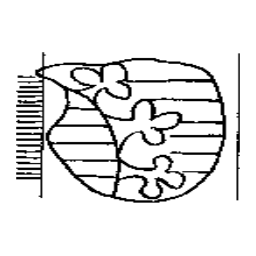

In [ ]:
from PIL import Image, ImageDraw
import os

image = Image.open(image_path).convert('RGB')
image

In [ ]:
import os

images_folder = "/content/drive/MyDrive/TestImages"
images = os.listdir(images_folder)

In [ ]:
images.index(image_ending)

99

In [ ]:
annoy_index = AnnoyIndex(512, 'angular')
annoy_index.load(annoy_index_path)

weights = models.ResNet18_Weights.IMAGENET1K_V1
model_annoy = models.resnet18(weights=weights)
model_annoy.fc = nn.Identity()
model_annoy.eval()

Get_nns_spotify_annoy(image, annoy_index, model_annoy)[0]

nns_annoy = Get_nns_spotify_annoy(image, annoy_index, model_annoy)
nns_annoy